In [1]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import cv2 as cv
import cv2

In [2]:
def colorRange(img, min_val, max_val):
    if img >= min_val and img <= max_val:
        return img
    else:
        return 0
colorRange = np.vectorize(colorRange)

Original Image


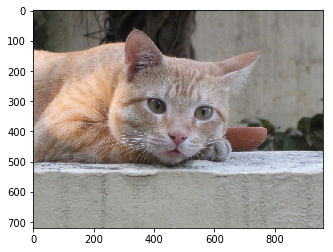

Image after ranging


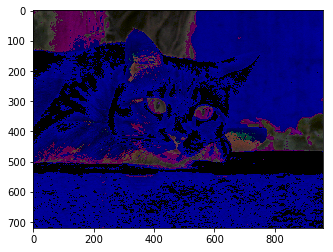

In [3]:
def colorRangeRGB(r_c, r_bw, g_c, g_bw, b_c, b_bw, image_path):
    # Find the minimun and maximum values of the range
    min_r = max(0, r_c - r_bw)
    max_r = min(255, r_c + r_bw)
    min_g = max(0, g_c - g_bw)
    max_g = min(255, g_c + g_bw)
    min_b = max(0, b_c - b_bw)
    max_b = min(255, b_c + b_bw)
    # print(min_r, max_r, min_g, max_g, min_b, max_g)
    
    # Read the image
    img = mpimg.imread(image_path)
    print("Original Image")
    plt.imshow(img)
    plt.show()
    img_ranged = np.zeros(img.shape, dtype="uint8")
    
    #Apply color ranging
    img_r, img_g, img_b = img[:,:,0], img[:,:,1], img[:,:,2]
    img_ranged[:,:,0] = colorRange(img_r, min_r, max_r)
    img_ranged[:,:,1] = colorRange(img_g, min_g, max_g)
    img_ranged[:,:,2] = colorRange(img_b, min_b, max_b)
    print("Image after ranging")
    plt.imshow(img_ranged)
    plt.show()
    
    
colorRangeRGB(50, 60, 20, 50, 90, 70, "Images/cat.ppm")

In [4]:
def colorRangeH(img, v1, v2):
    if v1 > v2:
        return img if img >= v1 or img <= v2 else 0
    else:
        return img if img >= v1 and img <= v2 else 0
colorRangeH = np.vectorize(colorRangeH)

def colorRangeSV(img, threshold):
    if img > threshold:
        return img
    else:
        return 0
colorRangeSV = np.vectorize(colorRangeSV)

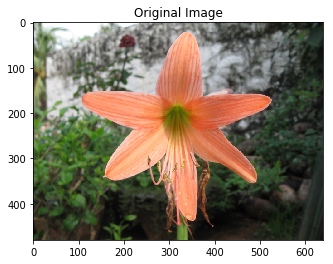

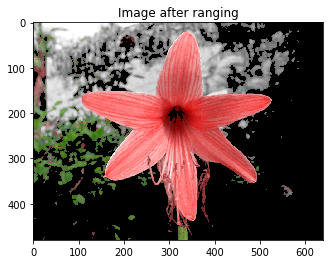

In [5]:
def colorRangeHSV(h_c, h_bw, s_c, v_c, image_path):
    # Find the minimun and maximum values of the range
    v1 = (h_c - h_bw) % 180
    v2 = (h_c + h_bw) % 180
    s_c = max(0, s_c)
    s_c = min(255, s_c)
    v_c = max(0, v_c)
    v_c = min(255, v_c)
    # print(min_r, max_r, min_g, max_g, min_b, max_g)
    
    # Read the image
    img = cv2.imread(image_path)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_ranged = np.zeros(img.shape, dtype="uint8")
    
    #Apply color ranging
    img_h, img_s, img_v = img_hsv[:,:,0], img_hsv[:,:,1], img_hsv[:,:,2]
    img_ranged[:,:,0] = colorRangeH(img_h, v1, v2)
    img_ranged[:,:,1] = colorRangeSV(img_s, s_c)
    img_ranged[:,:,2] = colorRangeSV(img_v, v_c)
    plt.title("Image after ranging")
    plt.imshow(cv2.cvtColor(img_ranged, cv2.COLOR_HSV2RGB))    
    
colorRangeHSV(60, 20, 50, 100, "Images/orange-flower.ppm")

## Vector Median Filter

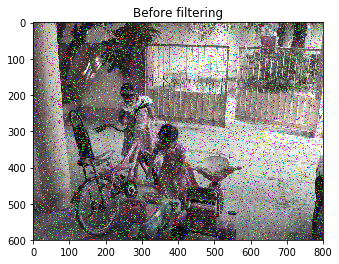

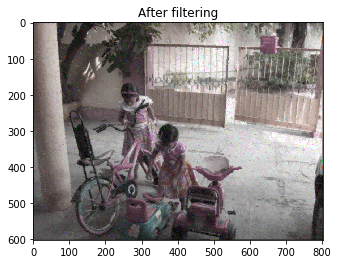

In [6]:
def VectorMedianFilter(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
    # Pad the image
    img_pad = cv2.copyMakeBorder(img_rgb, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    neighbours = [[0,0,0]] * 9
    height, width = img_pad.shape[0], img_pad.shape[1]
    for i in range(1,height-1):
        for j in range(1,width-1):
            neighbours[0] = img_pad[i-1, j-1,:]
            neighbours[1] = img_pad[i-1, j,:]
            neighbours[2] = img_pad[i-1, j+1,:]
            neighbours[3] = img_pad[i, j-1,:]
            neighbours[4] = img_pad[i, j, :]
            neighbours[5] = img_pad[i, j+1, :]
            neighbours[6] = img_pad[i+1, j-1, :]
            neighbours[7] = img_pad[i+1, j, :]
            neighbours[8] = img_pad[i+1, j+1, :]
            mean = np.mean(neighbours, axis=0)
            dist = []
            for x in range(9):
                dist.append(np.linalg.norm(neighbours[x] - mean))
            least = np.argmin(dist)
            img_pad[i,j,:] = neighbours[least]
            
    plt.title('After filtering')
    plt.imshow(img_pad)
    plt.show()

img = cv2.imread("Images/children-faded.ppm")
plt.title('Before filtering')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
VectorMedianFilter(img)


## Median filter (grey-scale)

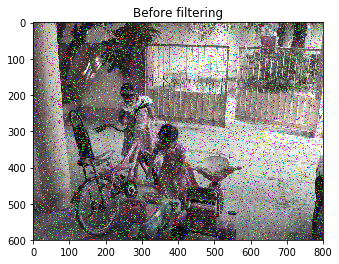

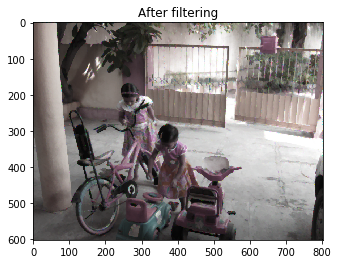

In [7]:
def VectorMedianFilter(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
    # Pad the image
    img_pad = cv2.copyMakeBorder(img_rgb, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    neighbours = [[0,0,0]] * 9
    height, width = img_pad.shape[0], img_pad.shape[1]
    for k in range(3):
        for i in range(1,height-1):
            for j in range(1,width-1):
                neighbours[0] = img_pad[i-1, j-1,k]
                neighbours[1] = img_pad[i-1, j,k]
                neighbours[2] = img_pad[i-1, j+1,k]
                neighbours[3] = img_pad[i, j-1,k]
                neighbours[4] = img_pad[i, j, k]
                neighbours[5] = img_pad[i, j+1, k]
                neighbours[6] = img_pad[i+1, j-1, k]
                neighbours[7] = img_pad[i+1, j, k]
                neighbours[8] = img_pad[i+1, j+1, k]
                neighbours.sort()
                img_pad[i,j,k] = neighbours[4]

    plt.title('After filtering')
    plt.imshow(img_pad)
    plt.show()

img = cv2.imread("Images/children-faded.ppm")
plt.title('Before filtering')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
VectorMedianFilter(img)


## Sobel edge detector

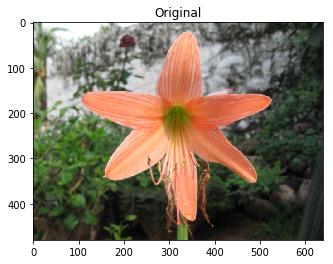

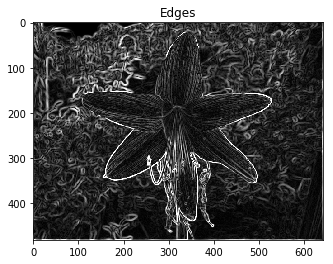

In [30]:
def SobelED(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
    # Pad the image
    img_pad = cv2.copyMakeBorder(img_rgb, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    height, width = img_pad.shape[0], img_pad.shape[1]
    new_image = img_pad.copy()
    sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobel_y = sobel_x.T
    neighbours = [0] * 9
    for i in range(1,height-1):
        for j in range(1,width-1):
            neighbours[0] = img_pad[i-1, j-1]
            neighbours[1] = img_pad[i-1, j]
            neighbours[2] = img_pad[i-1, j+1]
            neighbours[3] = img_pad[i, j-1]
            neighbours[4] = img_pad[i, j]
            neighbours[5] = img_pad[i, j+1]
            neighbours[6] = img_pad[i+1, j-1]
            neighbours[7] = img_pad[i+1, j]
            neighbours[8] = img_pad[i+1, j+1]
            neighbours = np.array(neighbours).reshape(3, 3)
            conv_x = neighbours * sobel_x
            conv_y = neighbours * sobel_y
            new_image[i,j] = min(255, np.sqrt(conv_x.sum() ** 2 + conv_y.sum() ** 2))
            neighbours = neighbours.flatten()
            
    
    plt.title('Edges')
    plt.imshow(new_image, cmap='gray')
    plt.show()
        
        
img = cv2.imread("Images/orange-flower.ppm")
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
SobelED(img)

## Vector edge detector

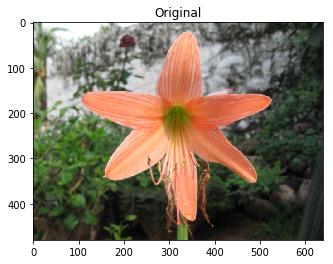

(482, 642)


/Users/sai/.virtualenvs/Oculus/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in long_scalars
  app.launch_new_instance()
/Users/sai/.virtualenvs/Oculus/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/Users/sai/.virtualenvs/Oculus/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/sai/.virtualenvs/Oculus/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


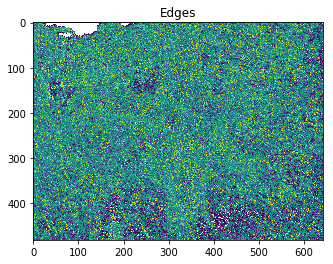

In [35]:
def VectorED(img):
    # Pad the image
    img_pad = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    height, width = img_pad.shape[0], img_pad.shape[1]
    new_image = np.zeros(img_pad.shape[:2])
    print(new_image.shape)
    for i in range(1,height-1):
        for j in range(1,width-1):
            c_x = img_pad[i, j] - img_pad[i-1, j]
            c_y = img_pad[i, j] - img_pad[i, j-1]
            
            c_xx = np.dot(c_x, c_x)
            c_yy = np.dot(c_y, c_y)
            c_xy = np.dot(c_x, c_y)
            
            theta = (0.5) * np.arctan(2 * c_xy / (c_xx - c_yy))
            magnitude = (0.5) * ((c_xx + c_xy) + ((c_xx - c_yy) * np.cos(2 * theta)) + 
                                (2 * c_xy * np.sin(theta)))
            
            new_image[i,j] = magnitude
            
    
    plt.title('Edges')
    plt.imshow(new_image)
    plt.show()
        
        
img = cv2.imread("Images/orange-flower.ppm")
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
VectorED(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))